In [1]:
import matplotlib
import pandas as pd
import json
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# General Analysis

Data gathered in the pilot study is included in the analysis.

TL;DR: 
- Overall accuracy is 0.36.
- Accuracy for negative emotions is 0.38
- Accuracy for positive emotions is 0.35


In [2]:
from py_sentimotion_mapper.sentimotion_mapper import Mapper
from coding_interpreter.metadata import Metadata

In [3]:
Mapper._load_data_if_needed()

In [4]:
df = pd.read_csv("data/completed_export.csv")
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status
0,A102_emb_p_2,0010541301574d33a41c542299f184a6,39,neg,0,A102,40,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
1,A102_fea_p_2,0010541301574d33a41c542299f184a6,10,neg,0,A102,32,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
2,A102_rej_p_3,0010541301574d33a41c542299f184a6,14,neg,0,A102,14,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
3,A102_sad_p_3,0010541301574d33a41c542299f184a6,6,neg,0,A102,43,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
4,A102_sha_v_2,0010541301574d33a41c542299f184a6,43,neg,0,A102,39,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
...,...,...,...,...,...,...,...,...,...,...
36295,A72_rej_p_3,ff807190c01845fa827a02d5e23ed14c,14,neg,0,A72,1,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36296,A91_anx_p_3,ff807190c01845fa827a02d5e23ed14c,34,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36297,A91_conf_p_3,ff807190c01845fa827a02d5e23ed14c,1,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36298,A91_disa_v_3,ff807190c01845fa827a02d5e23ed14c,37,neg,0,A91,34,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1


## Results overview

In [5]:
y_true = df[["emotion_id"]]
y_pred = df[["emotion_id_reply"]]

In [6]:
report = classification_report(y_true, y_pred,
                               target_names=Mapper.emotion_id_to_emotion.values())

print(report)

                          precision    recall  f1-score   support

                  regret       0.22      0.22      0.22       852
               confusion       0.40      0.47      0.43       804
           determination       0.54      0.58      0.56       720
                   doubt       0.24      0.29      0.27       756
                    envy       0.21      0.13      0.16       900
              admiration       0.18      0.19      0.19       780
                 sadness       0.47      0.47      0.47       768
               gratitude       0.28      0.31      0.29       804
     elevation_rejoicing       0.13      0.09      0.10       792
       positive_surprise       0.37      0.46      0.41       780
                    fear       0.53      0.50      0.51       876
       negative_surprise       0.31      0.39      0.35       804
                   anger       0.61      0.70      0.65       768
               amusement       0.50      0.45      0.47       804
         

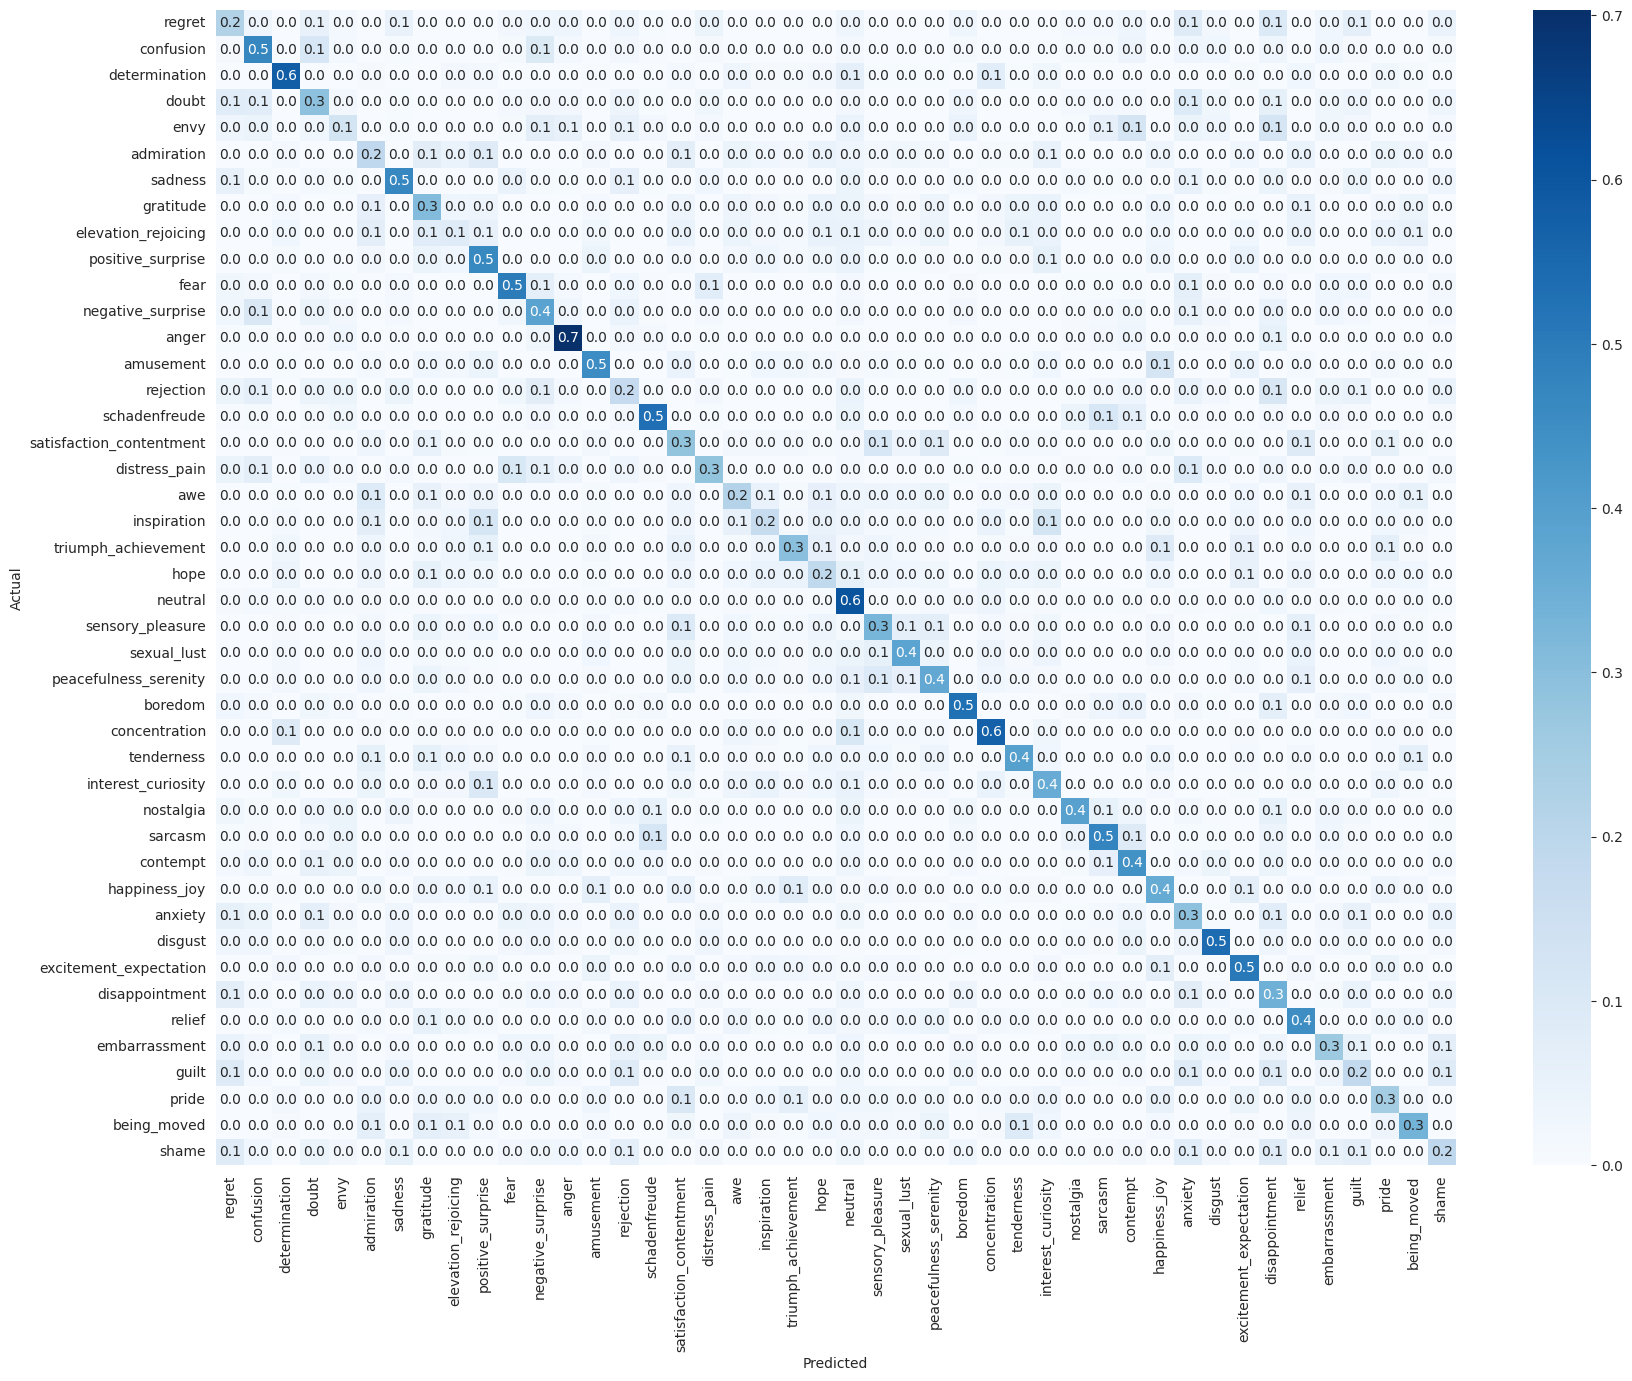

In [7]:
conf_matrix = confusion_matrix(y_true, y_pred, normalize="true")

emotion_ids = np.unique(y_true)
emotion_names = Mapper.get_emotion_from_id(emotion_ids)
df_cm = pd.DataFrame(conf_matrix, list(emotion_names), list(emotion_names))


plt.figure(figsize=(20, 15))
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt=".1f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Separating negative and positive emotions

### Negative Emotions

In [8]:
negative_emotions = []
for key, val in Mapper.emotion_to_valence.items():
    if val == "neg" or val == "neu":
        negative_emotions.append(key)

In [9]:
neg_df = df[df['valence'] == 'neg']
y_true = neg_df[["emotion_id"]]
y_pred = neg_df[["emotion_id_reply"]]

report = classification_report(y_true, y_pred,
                               target_names=negative_emotions)

print(report)

                   precision    recall  f1-score   support

            anger       0.22      0.22      0.22       852
          anxiety       0.40      0.47      0.43       804
          boredom       0.24      0.29      0.27       756
        confusion       0.21      0.13      0.16       900
         contempt       0.47      0.47      0.47       768
   disappointment       0.53      0.50      0.51       876
          disgust       0.31      0.39      0.35       804
    distress_pain       0.61      0.70      0.65       768
            doubt       0.18      0.18      0.18       828
    embarrassment       0.57      0.53      0.55       828
             envy       0.39      0.28      0.33       792
             fear       0.44      0.55      0.49       696
            guilt       0.51      0.53      0.52       768
        nostalgia       0.59      0.39      0.47       948
           regret       0.46      0.48      0.47       864
        rejection       0.35      0.44      0.39       

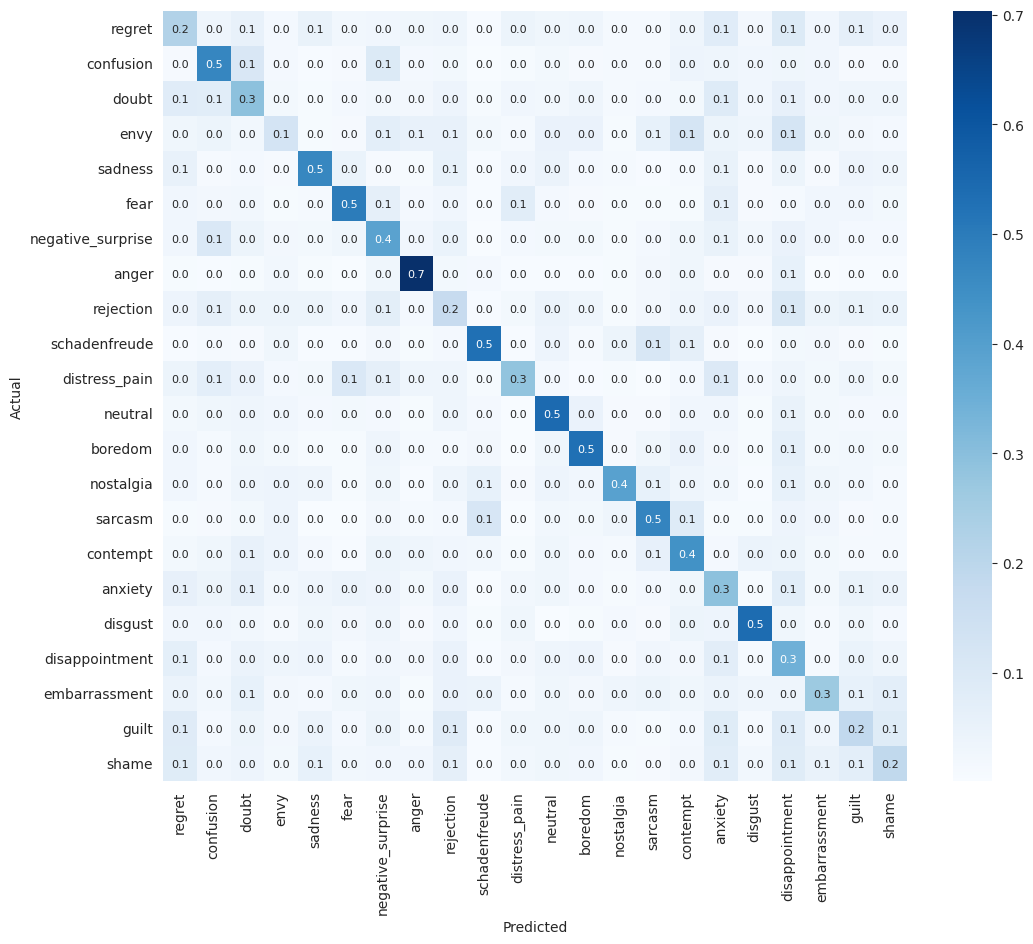

In [10]:
conf_matrix = confusion_matrix(y_true, y_pred, normalize="true")

emotion_ids = np.unique(y_true)
emotion_names = Mapper.get_emotion_from_id(emotion_ids)
df_cm = pd.DataFrame(conf_matrix, list(emotion_names), list(emotion_names))

plt.figure(figsize=(12, 10))
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt=".1f", annot_kws={"size": 8})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Positive Emotions

In [11]:
positive_emotions = []
for key, val in Mapper.emotion_to_valence.items():
    if val == "pos" or val == "neu":
        positive_emotions.append(key)

In [12]:
pos_df = df[df['valence'] == 'pos']
y_true = pos_df[["emotion_id"]]
y_pred = pos_df[["emotion_id_reply"]]

report = classification_report(y_true, y_pred,
                               target_names=positive_emotions)

print(report)

                          precision    recall  f1-score   support

              admiration       0.54      0.58      0.56       720
               amusement       0.18      0.19      0.19       780
                     awe       0.28      0.31      0.29       804
           concentration       0.13      0.09      0.10       792
satisfaction_contentment       0.37      0.46      0.41       780
           determination       0.50      0.45      0.47       804
     elevation_rejoicing       0.26      0.28      0.27       876
  excitement_expectation       0.27      0.21      0.24       816
               gratitude       0.24      0.17      0.20       804
           happiness_joy       0.40      0.30      0.34       840
                    hope       0.23      0.19      0.21       876
             inspiration       0.43      0.66      0.52       720
      interest_curiosity       0.34      0.33      0.34       864
             sexual_lust       0.46      0.39      0.42       840
         

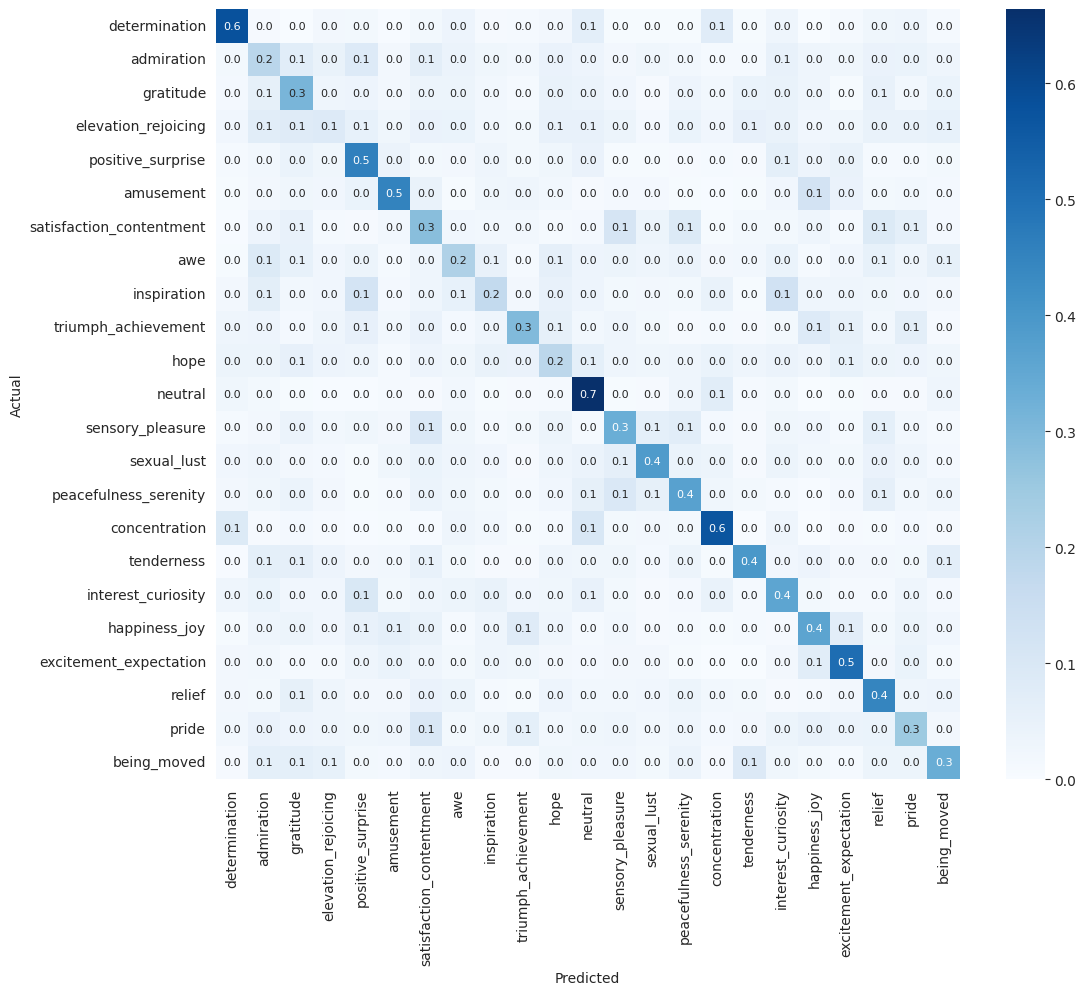

In [13]:
conf_matrix = confusion_matrix(y_true, y_pred, normalize="true")

emotion_ids = np.unique(y_true)
emotion_names = Mapper.get_emotion_from_id(emotion_ids)
df_cm = pd.DataFrame(conf_matrix, list(emotion_names), list(emotion_names))

plt.figure(figsize=(12, 10))
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt=".1f", annot_kws={"size": 8})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()